## Анализ бизнес-показателей

### Описание проекта
Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

- лог сервера с данными об их посещениях
- выгрузка их покупок за этот период
- рекламные расходы

Ход исследования предполагает:
1.  <a href=#2>Загрузка и предобработка данных</a>
2.  <a href=#2>Функции для расчёта и анализа</a>
3.  <a href=#3>Исследовательский анализ данных</a>
4.  <a href=#4>Рассчеты затрат на рекламу</a>
5.  <a href=#5>Оценка окупаемости</a>
6.  <a href=#6>Выводы. Рекомендации отделу маркетинга</a>


## <a name="1"> 1. Загрузка и предобработка данных.</a>

Загрузим данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.
Изучим данные и выполним предобработку. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
try:
    visits = pd.read_csv('visits_info_short.csv')
    orders = pd.read_csv('orders_info_short.csv')
    costs = pd.read_csv('costs_info_short.csv')
except:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')

Структура `visits_info_short.csv:`

`User Id` — уникальный идентификатор пользователя,

`Region` — страна пользователя,

`Device` — тип устройства пользователя,

`Channel` — идентификатор источника перехода,

`Session Start` — дата и время начала сессии,

`Session End` — дата и время окончания сессии.


Структура `orders_info_short.csv:`

`User Id` — уникальный идентификатор пользователя,

`Event Dt` — дата и время покупки,

`Revenue` — сумма заказа.

Структура `costs_info_short.csv:`

`dt` — дата проведения рекламной кампании,

`Channel` — идентификатор рекламного источника,

`costs` — расходы на эту кампанию.

### Предобработка visits

In [4]:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [5]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [6]:
# Переименуем столбцы
visits.columns = visits.columns.str.lower().str.replace(' ','_')

In [7]:
# Приведем даты к правильному типу
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [8]:
visits.duplicated().sum()

0

Дубликатов нет

In [9]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


### Предобработка orders

In [10]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [12]:
# Переименуем столбцы
orders.columns = orders.columns.str.lower().str.replace(' ','_')

In [13]:
# Приведем даты к правильному типу
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [14]:
orders.duplicated().sum()

0

Дубликатов нет

In [15]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


### Предобработка costs

In [16]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.30
1,2019-05-02,FaceBoom,78.10
2,2019-05-03,FaceBoom,85.80
3,2019-05-04,FaceBoom,136.40
4,2019-05-05,FaceBoom,122.10


In [17]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [18]:
# Переименуем столбцы
costs.columns = costs.columns.str.lower()

In [19]:
# Приведем даты к правильному типу
costs['dt'] = pd.to_datetime(costs['dt'])

In [20]:
costs.duplicated().sum()

0

Дубликатов нет

In [21]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


Предобработка выполнена, были изменены названия столбцов и типы данных в колонках с датами.

## <a name="2"> 2. Функции для расчёта и анализа.</a>

Зададим функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

Зададим функцию для создания профилей пользователей

In [22]:
def get_profiles(visits):
    
    # сортируем сессии по ID пользователя и дате посещения
    # группируем по ID и находим первые значения session_start, channel, region, device
    # столбец с временем первого посещения назовём first_ts
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg({'session_start': 'first', 'channel': 'first', 'region': 'first', 'device': 'first'})
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    # эти данные понадобятся для когортного анализа
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    
    # определим "платящий" ли пользователь
    profiles['payer'] =  profiles['user_id'].isin(orders['user_id'].unique())

    return profiles

Зададим функции для подсчета удержания и конверсии

In [23]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [24]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

Зададим функцию для расчета LTV и ROI

In [25]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

Зададим функции для построения графиков

In [26]:
# Функция для сглаживания
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [27]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [28]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [29]:
# Функуия для визуализации 
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

Функции собраны, теперь можно переходить к анализу.

# <a name="3"> 3. Исследовательский анализ данных.</a>


- Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.
- Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [30]:
# Вызовем функцию get_profiles() и определим минимальную и максимальную даты привлечения пользователей.
profiles = get_profiles(visits)

In [31]:
min_date = profiles['dt'].min()
max_date = profiles['dt'].max()
profiles['dt'] = pd.to_datetime(profiles['dt'])
print(f'Минимальная дата привлечения пользователей {min_date}')
print(f'Максимальная дата привлечения пользователей {max_date}')

Минимальная дата привлечения пользователей 2019-05-01
Максимальная дата привлечения пользователей 2019-10-27


Даты совпадают с вводными задания.

In [32]:
total_payers = profiles['payer'].mean()
print(f'Платящих пользователей всего: {total_payers:.1%}')

Платящих пользователей всего: 5.9%


In [33]:
# Определяем из каких стран приходят пользователи и находим долю платящих клиентов
region_profiles = profiles.groupby('region').agg({'user_id': 'nunique', 'payer': ['sum', 'mean']})
region_profiles.columns = ['total_user', 'total_payers', 'ratio']
region_profiles = region_profiles.sort_values(by='ratio', ascending=False).style.format({'ratio': '{:.2%}'})
region_profiles

,total_user,total_payers,ratio
region,,,
United States,100002,6902,6.90%
Germany,14981,616,4.11%
UK,17575,700,3.98%
France,17450,663,3.80%


In [34]:
# Определяем какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи
device_profiles = profiles.groupby('device').agg({'user_id': 'nunique', 'payer': ['sum', 'mean']})
device_profiles.columns = ['total_user', 'total_payers', 'ratio']
device_profiles = device_profiles.sort_values(by='ratio', ascending=False).style.format({'ratio': '{:.2%}'})
device_profiles

,total_user,total_payers,ratio
device,,,
Mac,30042,1912,6.36%
iPhone,54479,3382,6.21%
Android,35032,2050,5.85%
PC,30455,1537,5.05%


In [35]:
# Определяем рекламные источники привлечения и долю платящих клиентов
sorted_profiles = profiles.groupby(['channel']).agg({'user_id': 'nunique','payer': ['sum', 'mean']})
sorted_profiles.columns = ['total_user', 'total_payers', 'ratio']
sorted_profiles = sorted_profiles.sort_values(by='ratio', ascending=False).style.format({'ratio': '{:.2%}'})
sorted_profiles

,total_user,total_payers,ratio
channel,,,
FaceBoom,29144,3557,12.20%
AdNonSense,3880,440,11.34%
lambdaMediaAds,2149,225,10.47%
TipTop,19561,1878,9.60%
RocketSuperAds,4448,352,7.91%
WahooNetBanner,8553,453,5.30%
YRabbit,4312,165,3.83%
MediaTornado,4364,156,3.57%
LeapBob,8553,262,3.06%


Пользователи приходят в приложение из 4 стран: США, Великобритания, Франция и Германия. Всего платящих пользователей у сервиса -5,9%. Платящих пользователей больше всего в США, как и общее количество пользоватей приложения Procrastinate Pro+, что в 2 раз превышает количество пользователей из других стран. Доля платящих также самая высокая у США, у остальных стран примерно одинаковая доля. Но в целом доля платящих пользователей достаточно мала.

Клиенты пользуются такими устройствами, как iPhone, Android, Mac и PC. Больше всего пользователей, которые пользуются iPhone и доля платящих здесь тоже выше. Пользователей остальных устройств примерно одинаковое количество, как и доля платящих пользователей для всех платформ примерно равна, но можно отметить, что на РС доля платящих ниже всех.

Источники привлечения - это десять рекламных каналов, но больше всего пользователей приходят в сервис органическим путем, однако доля платящих среди них всего 2%. Больше всего платящих пользователей приходит из канала FaceBoom - 12%. По количеству всех пользователей FaceBoom занимает второе место, можно считать что это самый работающий канал привлечения клиентов. На третьем месте по общему количесту пользователей находится канал TipTop с долей платящих - 9,6%.

## <a name="4"> 4. Расчет затрат на рекламу.</a>
### Маркетинг

- Посчитаем общую сумму расходов на маркетинг.
- Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Отразим это на одном графике.
- Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. 

Посчитаем общую сумму расходов на маркетинг и посмотрим как распределены траты по рекламным источникам.

In [36]:
total_cost = costs['costs'].sum()
print(f'Общие затраты на рекламу: {total_cost:.2f}')

Общие затраты на рекламу: 105497.30


In [37]:
display(costs
        .groupby('channel')['costs']
        .agg(['sum']).reset_index()
        .assign(ratio=lambda x: x['sum'] / x['sum'].sum())
        .sort_values('sum', ascending=False)
        .style.format({'ratio': '{:.2%}'})
       )

,channel,sum,ratio
6,TipTop,54751.300000,51.90%
1,FaceBoom,32445.600000,30.75%
7,WahooNetBanner,5151.000000,4.88%
0,AdNonSense,3911.250000,3.71%
4,OppleCreativeMedia,2151.250000,2.04%
5,RocketSuperAds,1833.000000,1.74%
2,LeapBob,1797.600000,1.70%
9,lambdaMediaAds,1557.600000,1.48%
3,MediaTornado,954.480000,0.90%
8,YRabbit,944.220000,0.90%


Можно сделать вывод, что популярные каналы, такие как TipTop и FaceBoom, обходятся дороже, поскольку у них самые высокие общие расходы на рекламу.

In [38]:
# Добавим колонку с мясецем и неделей
costs['month'] = costs['dt'].astype('datetime64[M]')
costs['week'] = costs['dt'].astype('datetime64[W]') 

Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.

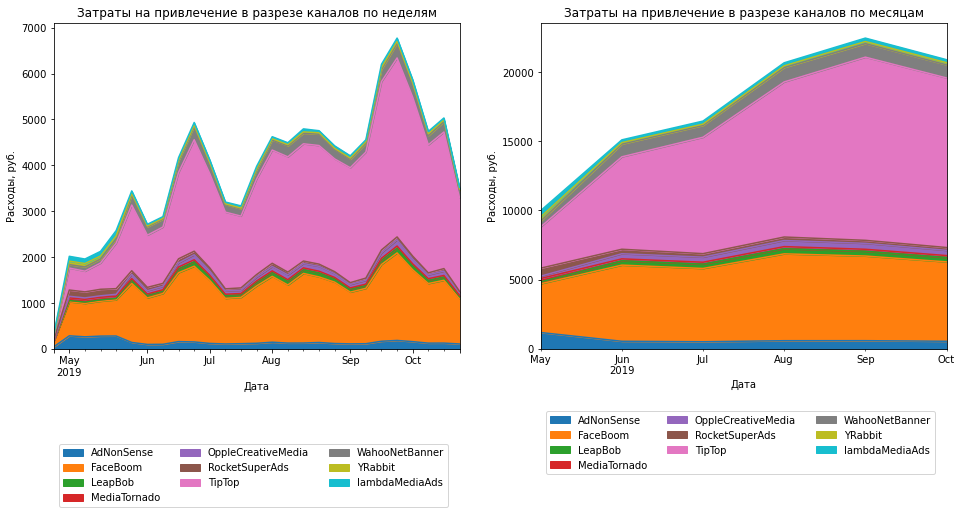

In [39]:
# Размер сетки для графиков
fig, ax = plt.subplots(1, 2, figsize=(16, 6)) 

# Динамика затрат по неделям
(costs
 .pivot_table(
    index=costs.week,
    values='costs',
    aggfunc='sum',
    columns='channel'
)
 .plot.area(ax=ax[0])
)
ax[0].set_title('Затраты на привлечение в разрезе каналов по неделям', loc='center')
ax[0].set_ylabel('Расходы, руб.')
ax[0].set_xlabel('Дата')
ax[0].legend(ncol=3, bbox_to_anchor=(0, -0.5), loc='lower left')

# Динамика затрат по месяцам
(costs
 .pivot_table(
    index=costs.month,
    values='costs',
    aggfunc='sum',
    columns='channel'
)
 .plot.area(ax=ax[1])
)

ax[1].set_title('Затраты на привлечение в разрезе каналов по месяцам', loc='center')
ax[1].set_ylabel('Расходы, руб.')
ax[1].set_xlabel('Дата')
ax[1].legend(ncol=3, bbox_to_anchor=(0, -0.4), loc='lower left')
plt.show()

In [40]:
# Таблица затрат по месяцам
costs.groupby(['channel', 'month'])['costs'].sum().reset_index()

,channel,month,costs
0,AdNonSense,2019-05-01,"1,169.70"
1,AdNonSense,2019-06-01,538.65
2,AdNonSense,2019-07-01,504.00
3,AdNonSense,2019-08-01,579.60
4,AdNonSense,2019-09-01,581.70
5,AdNonSense,2019-10-01,537.60
6,FaceBoom,2019-05-01,"3,524.40"
7,FaceBoom,2019-06-01,"5,501.10"
8,FaceBoom,2019-07-01,"5,294.30"
9,FaceBoom,2019-08-01,"6,274.40"


Сумма затрат на все источники составляет 105497.3. Очевидно, что компания тратит намного больше на TipTop и FaceBoom, чем на другие платформы. Если FaceBoom имеет самую высокую долю платящих клиентов, то эти траты вполне логичны. Однако, TipTop занимает всего лишь 4-е место по доле платящих клиентов, что делает его высокие затраты нелогичными.

Также вызывает сомнения уменьшение затрат на источник AdNonSense, несмотря на то, что он занимает второе место по доле платящих клиентов. Возможно, стоит пересмотреть стратегию в отношении этого источника и перераспределить бюджеты.

Однако, интересно отметить, что бюджет на источник WahooNetBanner был увеличен в 2 раза, несмотря на его низкую долю платящих клиентов (6-е место). Это может указывать на то, что компания видит потенциал в этом источнике и решила увеличить инвестиции. В любом случае, возможно стоит провести пересмотр маркетинговой компании и пересмотреть распределение бюджета с учетом данных и инсайтов.

Узнаем стоимость привлечение одного пользователя (CAC) из каждого источника.

In [41]:
profiles.head()

,user_id,first_ts,channel,region,device,dt,month,payer
0,599326,2019-05-07 20:58:57,FaceBoom,United States,Mac,2019-05-07,2019-05-01,True
1,4919697,2019-07-09 12:46:07,FaceBoom,United States,iPhone,2019-07-09,2019-07-01,False
2,6085896,2019-10-01 09:58:33,organic,France,iPhone,2019-10-01,2019-10-01,False
3,22593348,2019-08-22 21:35:48,AdNonSense,Germany,PC,2019-08-22,2019-08-01,False
4,31989216,2019-10-02 00:07:44,YRabbit,United States,iPhone,2019-10-02,2019-10-01,False


In [42]:
# Посчитаем число пользователей привлеченных в определенный день каждым каналом
ad_users = (
    profiles.groupby(['dt', 'channel'])
    .agg({'user_id': 'nunique'})
    .rename(columns={'user_id': 'unique_users'})
    .reset_index() 
)
ad_users.head()

,dt,channel,unique_users
0,2019-05-01,AdNonSense,39
1,2019-05-01,FaceBoom,104
2,2019-05-01,LeapBob,12
3,2019-05-01,MediaTornado,26
4,2019-05-01,OppleCreativeMedia,18


In [43]:
# Объединим траты на рекламу и число пользоваталей 
costs = costs.merge(ad_users, on=['dt', 'channel'], how='left')

# Считаем CAC
costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

costs.head()

,dt,channel,costs,month,week,unique_users,acquisition_cost
0,2019-05-01,FaceBoom,113.30,2019-05-01,2019-04-25,104,1.09
1,2019-05-02,FaceBoom,78.10,2019-05-01,2019-05-02,72,1.08
2,2019-05-03,FaceBoom,85.80,2019-05-01,2019-05-02,76,1.13
3,2019-05-04,FaceBoom,136.40,2019-05-01,2019-05-02,123,1.11
4,2019-05-05,FaceBoom,122.10,2019-05-01,2019-05-02,113,1.08


In [44]:
# Добавим стоимость привлечения в профили
profiles = profiles.merge(
    costs[['dt', 'channel', 'acquisition_cost']],
    on=['dt', 'channel'],
    how='left',
)
# Заменим пропуски на ноль для CAC органических пользователей
profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

In [45]:
profiles.head()

,user_id,first_ts,channel,region,device,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,United States,Mac,2019-05-07,2019-05-01,True,1.09
1,4919697,2019-07-09 12:46:07,FaceBoom,United States,iPhone,2019-07-09,2019-07-01,False,1.11
2,6085896,2019-10-01 09:58:33,organic,France,iPhone,2019-10-01,2019-10-01,False,0.00
3,22593348,2019-08-22 21:35:48,AdNonSense,Germany,PC,2019-08-22,2019-08-01,False,0.99
4,31989216,2019-10-02 00:07:44,YRabbit,United States,iPhone,2019-10-02,2019-10-01,False,0.23


In [46]:
# Посмотрим сколько в среднем стоило привлечение одного пользователя из каждого источника
display(
    profiles
    .groupby('channel')['acquisition_cost']
    .mean()
    .reset_index()
    .sort_values('acquisition_cost', ascending=False)
)

avg_cost = round(profiles.agg({'acquisition_cost': 'mean'}), 2);
print(f'Средняя стоимость привлечения одного клиента по всему проекту: {avg_cost}')

avg_cost = round(profiles[profiles['channel'] != 'organic']['acquisition_cost'].mean(),2)
print(f'Средняя стоимость привлечения одного клиента без органических пользователей: {avg_cost}')

,channel,acquisition_cost
6,TipTop,2.80
1,FaceBoom,1.11
0,AdNonSense,1.01
9,lambdaMediaAds,0.72
7,WahooNetBanner,0.60
5,RocketSuperAds,0.41
4,OppleCreativeMedia,0.25
8,YRabbit,0.22
3,MediaTornado,0.22
2,LeapBob,0.21


Средняя стоимость привлечения одного клиента по всему проекту: acquisition_cost   0.70
dtype: float64
Средняя стоимость привлечения одного клиента без органических пользователей: 1.13


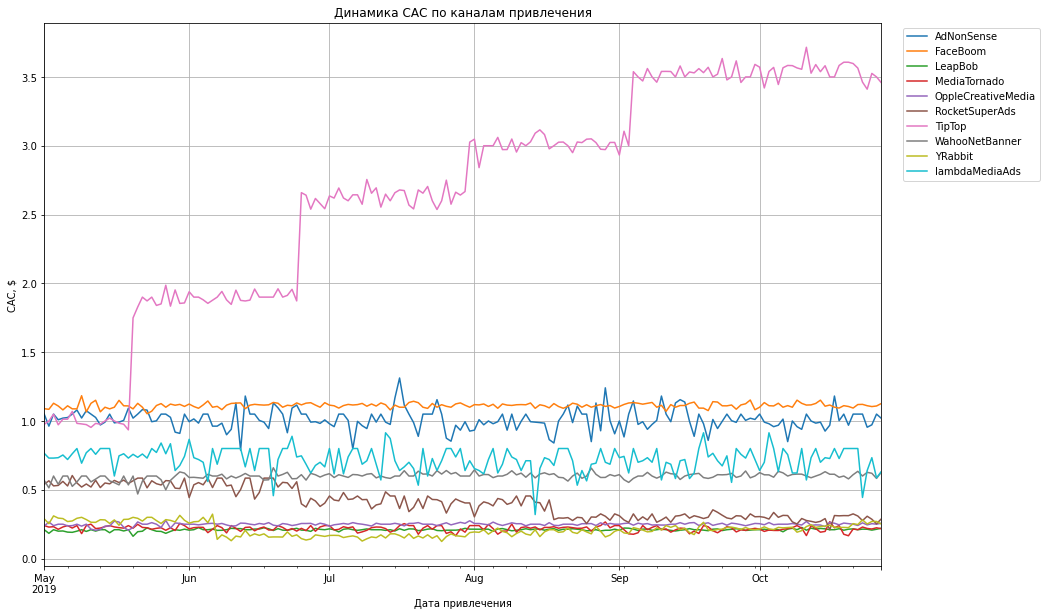

In [47]:
# Построим график истории изменений CAC по каналам привлечения

profiles.query('channel != "organic"').pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(15, 10))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.legend(bbox_to_anchor=(1.02, 1.0), loc='best')
plt.show()

Средняя стоимость привлечения одного клиента по всему проекту (включая органических пользователей) составляет 0.70.

Средняя стоимость привлечения одного клиента без учета органических пользователей (только платные источники привлечения) составляет 1.13.

Исходя из этой информации, можно сделать следующие выводы:

1. Популярные каналы, такие как TipTop, обходятся дороже в среднем, поскольку их стоимость привлечения одного клиента превышает среднюю стоимость по всему проекту.
2. Канал FaceBoom имеет самый высокий показатель платежности, но его стоимость привлечения на одного клиента ниже, чем у TipTop.
3. Источник TipTop имеет самые высокие бюджеты на рекламу, но при этом доля платящих клиентов не является самой большой.
4. График изменения расходов показывает, что траты на TipTop росли с каждым месяцем, в то время как траты на FaceBoom росли гораздо медленнее. Остальные источники значительно уступают по объему расходов на маркетинг.

Данная информация может помочь нам разобраться с эффективностью различных рекламных источников и принять соответствующие решения для оптимизации бюджета и привлечения платящих клиентов.

## <a name="5"> 5. Оценка окупаемости рекламы.</a>

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. Будем считать, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.

- Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания.
- Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответим на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Проанализируем общую окупаемость рекламы. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [48]:
# Установим момент и горизонт анализа (из условий)
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

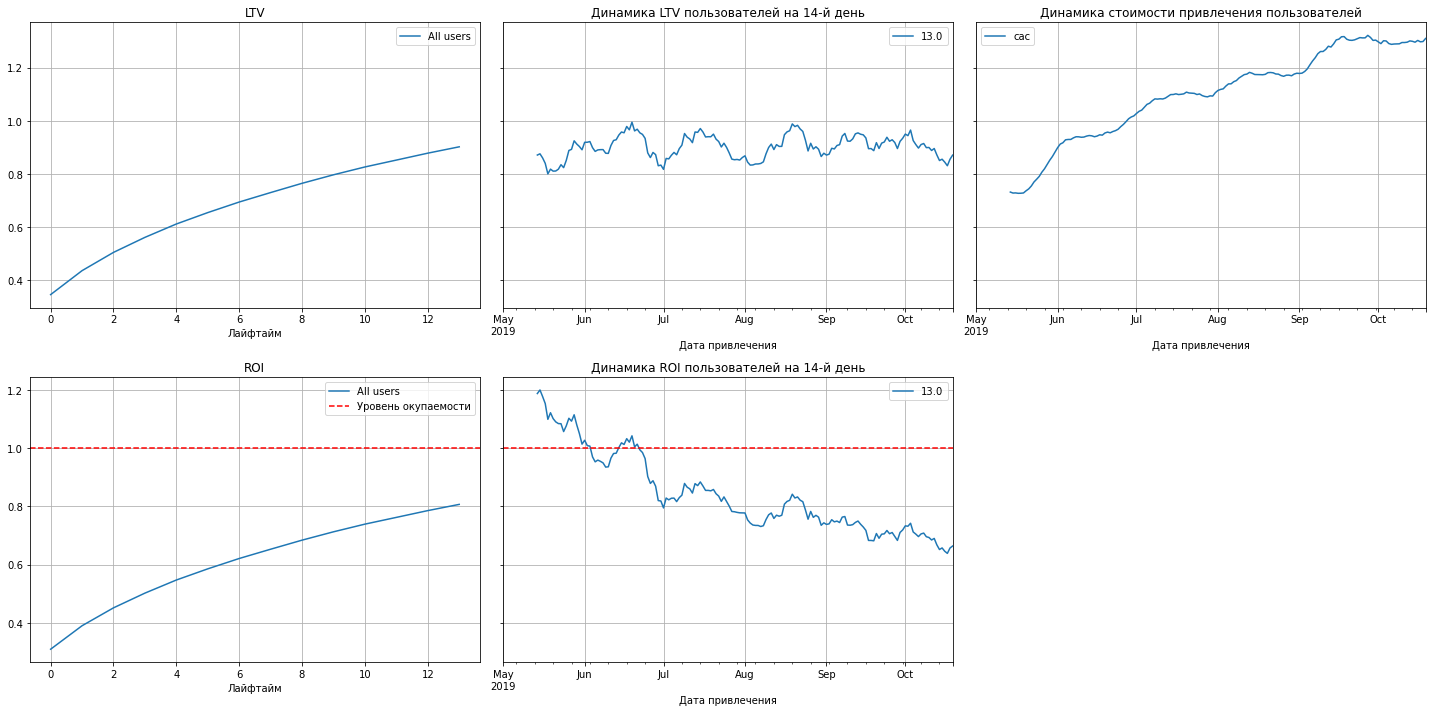

In [49]:
# Уберем оранических пользователей
profiles_without_organic = profiles[profiles['channel'] != 'organic'].copy()

# Вызовем функцмю LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_without_organic, orders, observation_date, horizon_days
)

# Визуализируем
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Кривая LTV плавно растет от нуля, значит LTV рассчитан верно.
LTV в целом достаточно стабилен, значит, дело не в ухудшении качества пользователей. Реклама не окупается к 14 дню жизни пользователей. Стоимсоть привлечения пользователей резко возрастает начиная с июня. Вместе с этим, начиная с июля ROI всегда меньше единицы (100%)
Чтобы разобраться в причинах, пройдём по всем доступным характеристикам пользователей — устройству, стране и источнику.

Посмотрим окупаемость с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

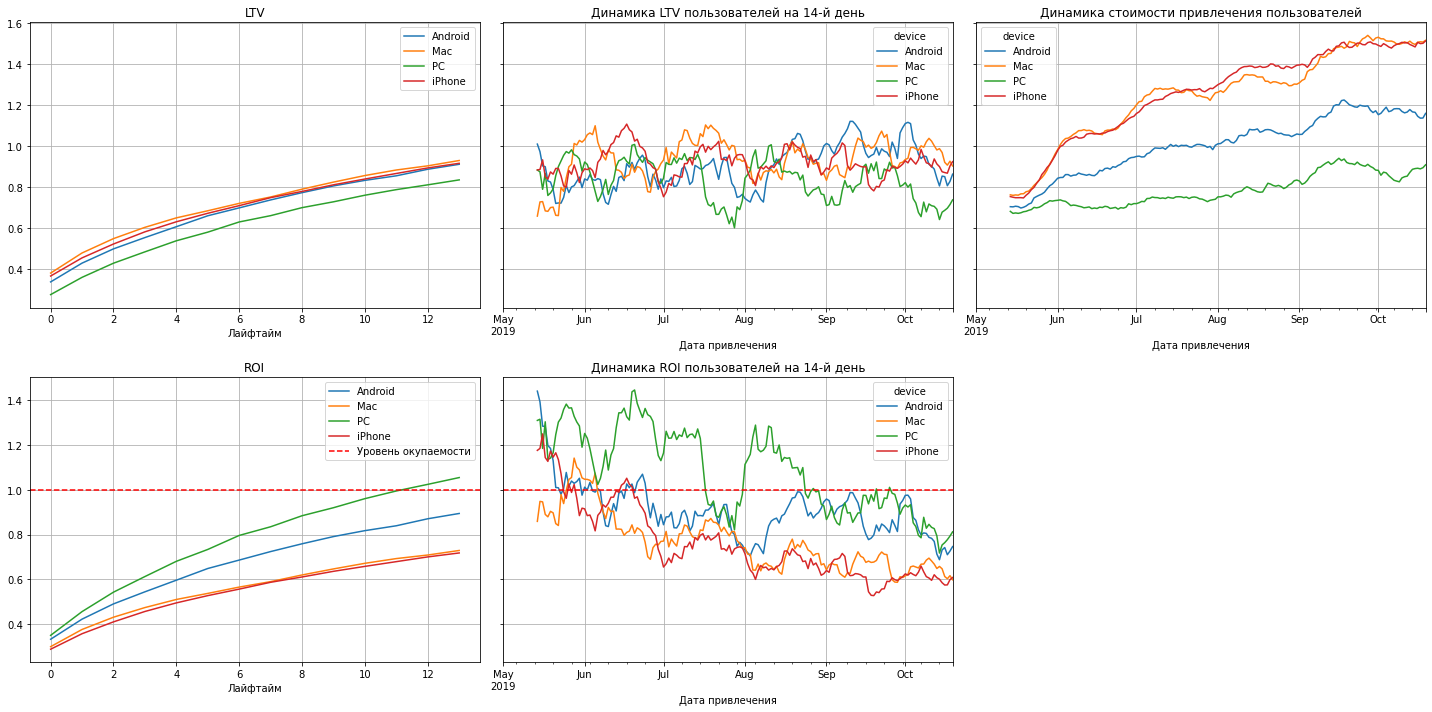

In [50]:
# Окупаемость с разбивкой по устройствам
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

К концу 2-й недели окупаются лишь пользователи PC. Динамика стоимости привлечения клиентов показывает, что наименьшие расходы были как раз в отношении пользователей PC. Также можно заметить, что стоимость привлечения пользователей iPhone и Mac значительно выше, чем для пользователей других устройств. Возможно, это связано и со страной этих пользователей.

Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

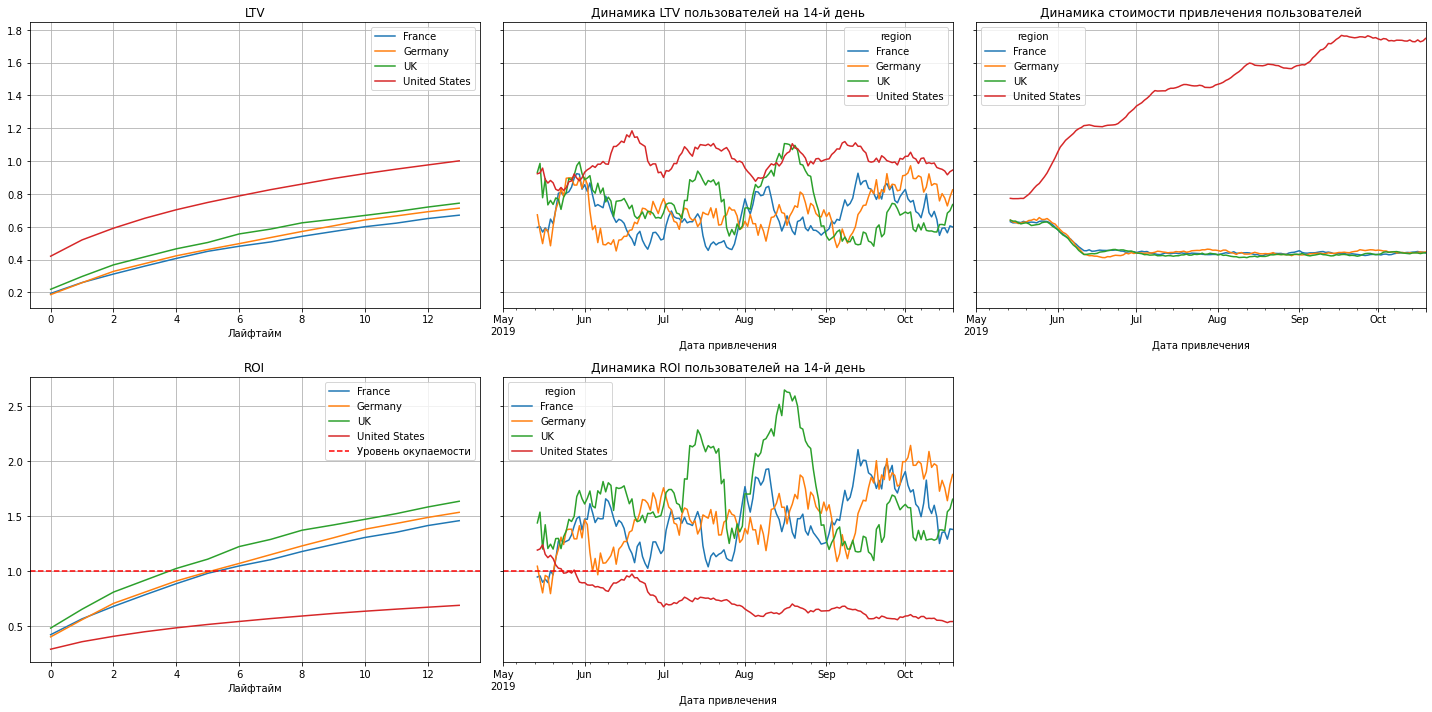

In [51]:
# Окупаемость с разбивкой по странам
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Реклама не окупилась только в США из 4 регионов. Начиная с июня окупаемость рекламы в Америке резко упала. США имеет самую большую долю платящих клиентов. И в целом клиентов из США намного больше, чем из других стран, но и стоимость на рекламу в США существенно выше. Пользователи из Англии, Германии и Франции хорошо окупаются.

Посмотрим на окупаемость без пользователей из США

In [52]:
# исключение из таблицы пользователей США
profiles_no_USA = profiles_without_organic.query('region != "United States"')
profiles_USA = profiles_without_organic.query('region == "United States"')

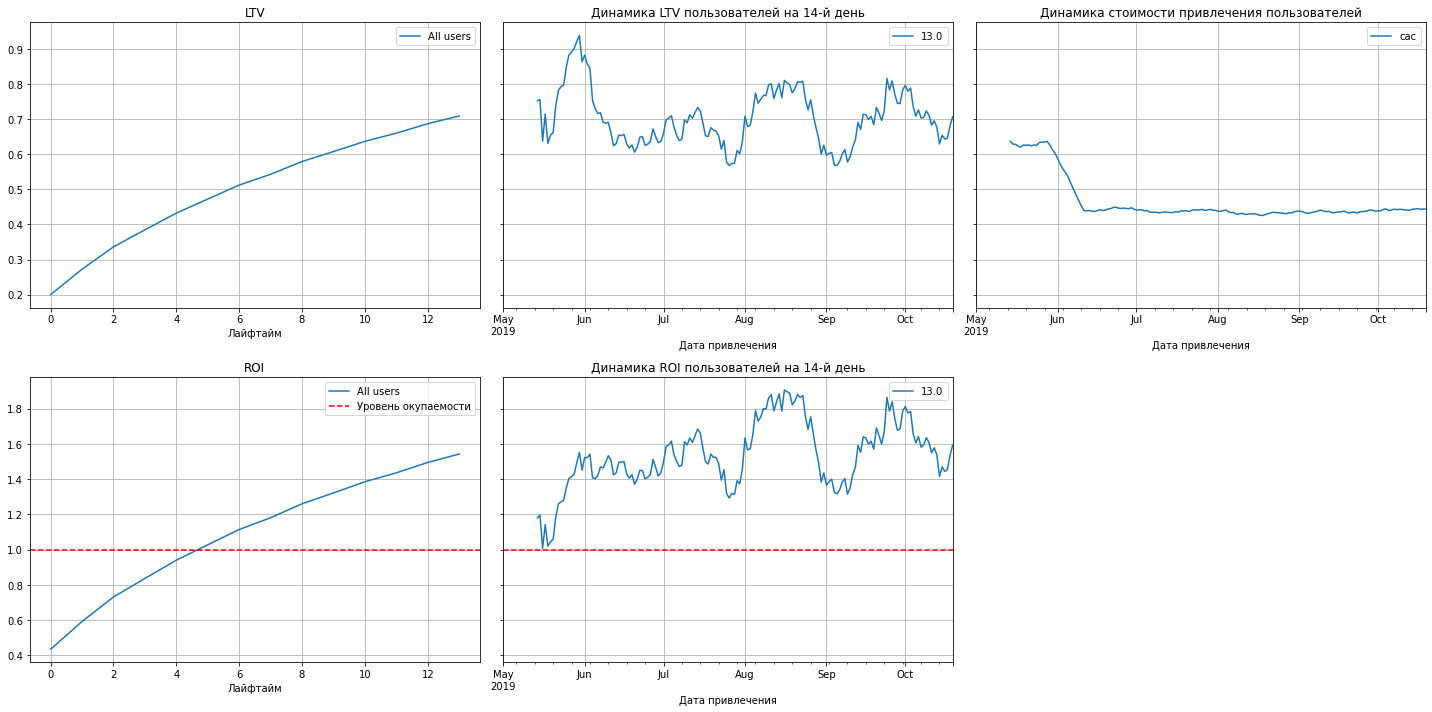

In [53]:

# Вызовем функцмю LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_no_USA, orders, observation_date, horizon_days
)

# Визуализируем
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Окупаемость затрат здесь мы видим уже на четвертый день, при этом затраты на рекламу значительно снизились в июне, а окупаемость в августе составляет 180%. Страны, за исключением США, показывают положительную динамику окупаемости.

Посмотрим окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

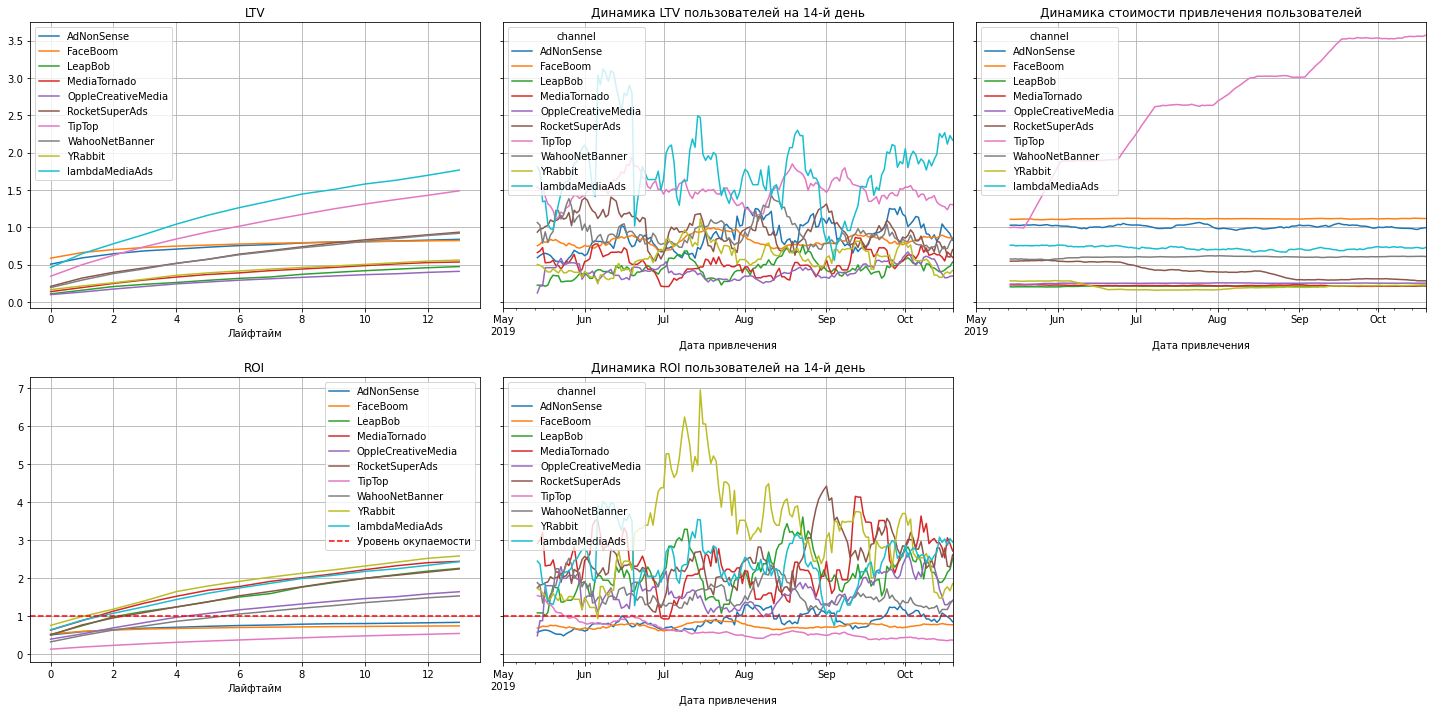

In [54]:
# Окупаемость с разбивкой по каналам
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Посмотрим окупаемость рекламы с разбивкой по рекламным каналам из Европы.

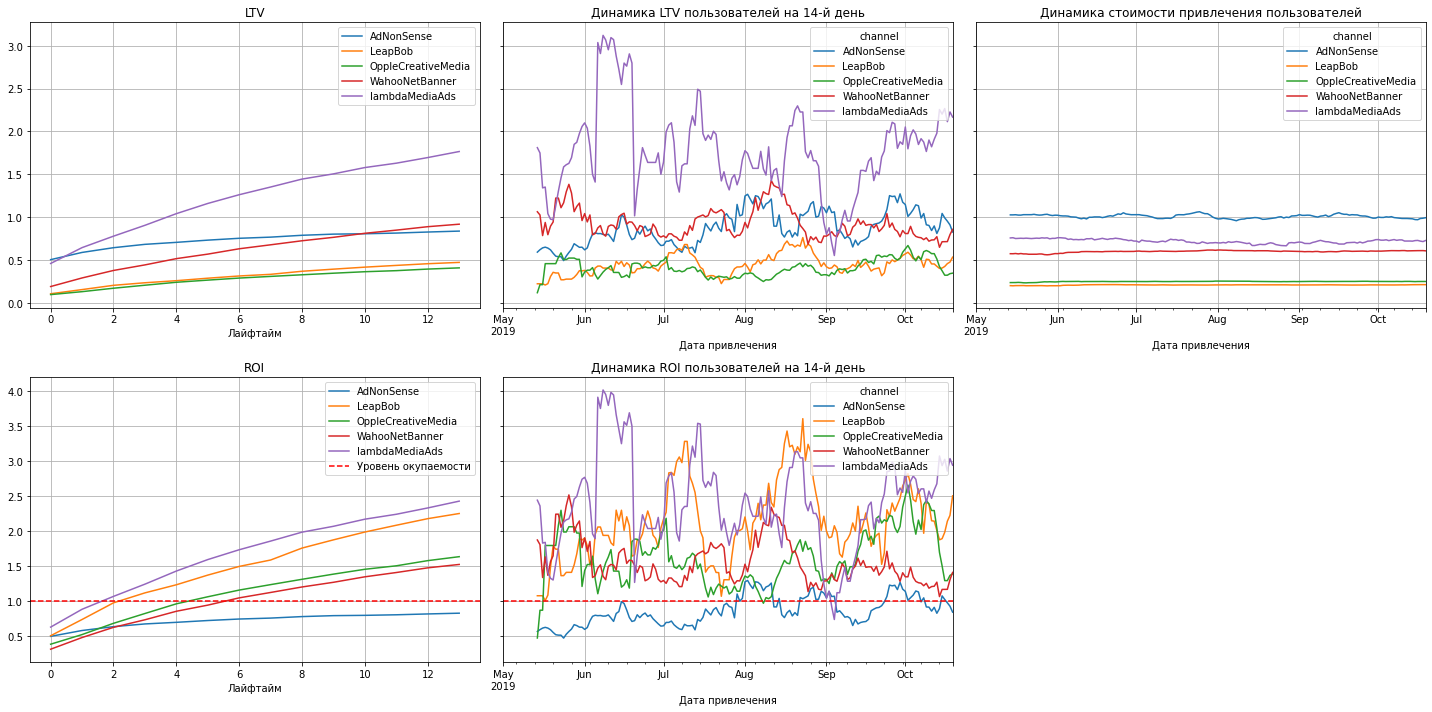

In [55]:
# Окупаемость с разбивкой по каналам
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_no_USA, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Посмотрим конверсию и удержание каналов из Европы.

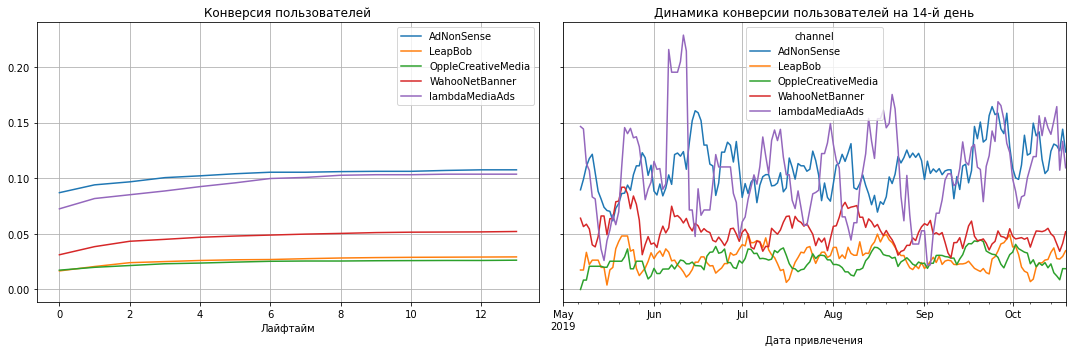

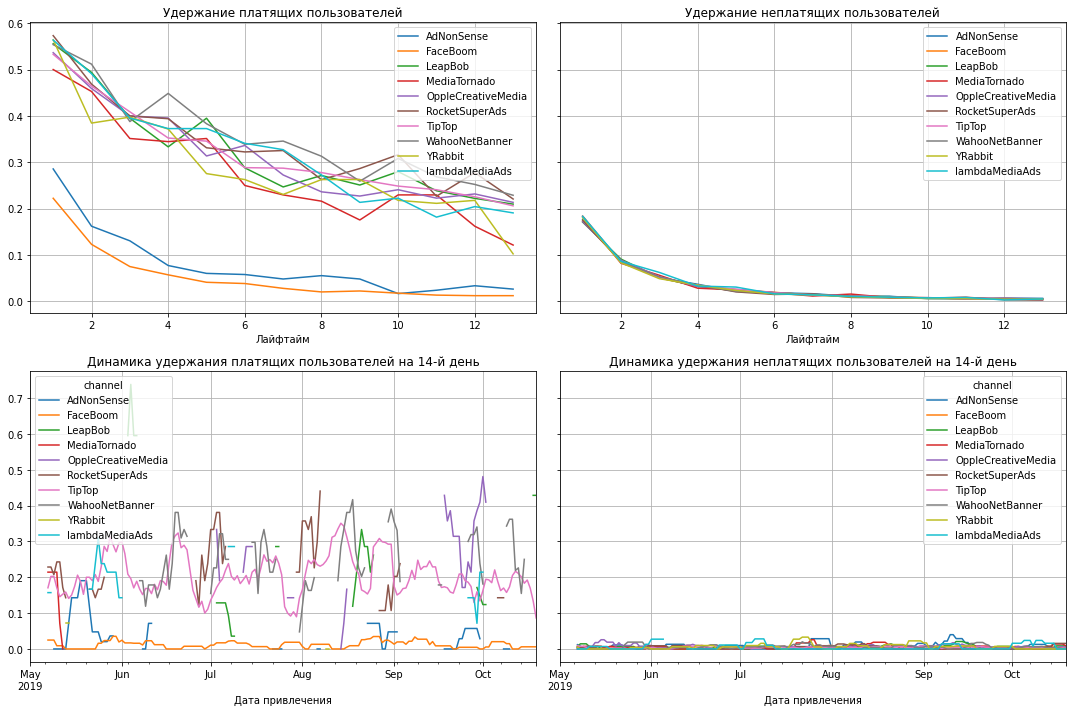

In [56]:
# смотрим конверсию и удержание с разбивкой по каналам
dimensions = ['channel']

# Конверсия
conversion_raw, conversion_grouped, conversion_history = get_conversion(
   profiles_no_USA, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 


# Удержание
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_without_organic, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Посмотрим окупаемость рекламы с разбивкой по рекламным каналам пользователей США

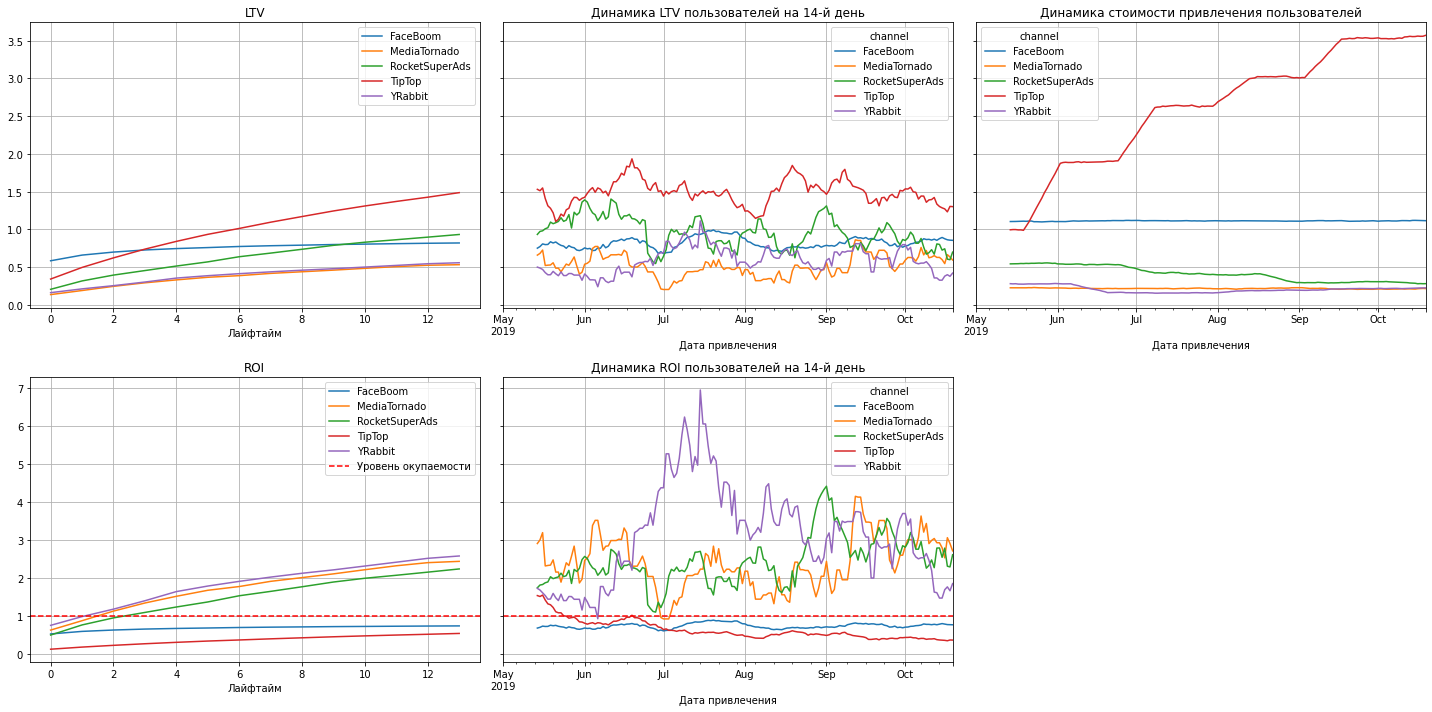

In [57]:
# Окупаемость с разбивкой по каналам
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_USA, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Посмотрим конвертацию и удержание каналов из США.

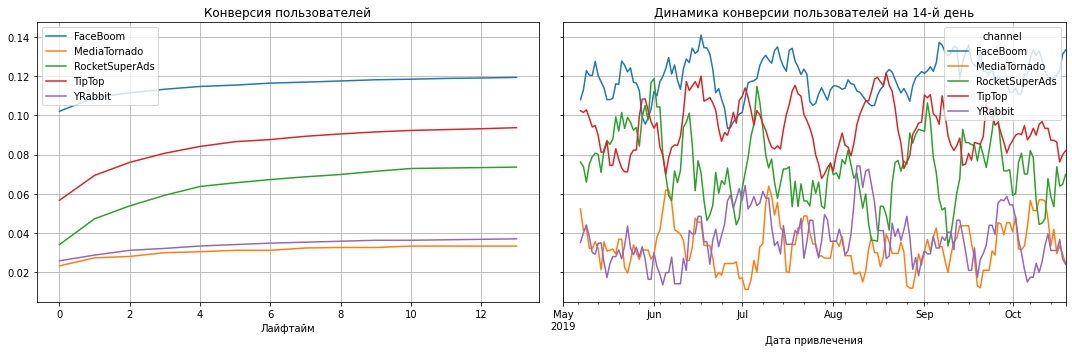

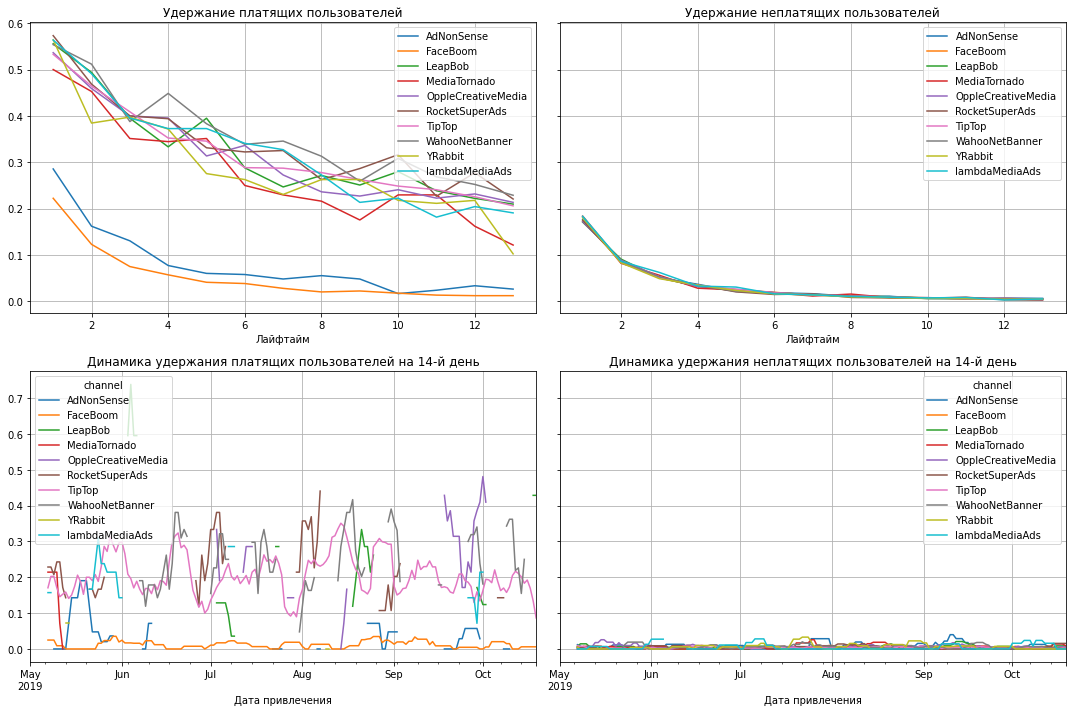

In [58]:
# смотрим конверсию и удержание с разбивкой по каналам
dimensions = ['channel']

# Конверсия
conversion_raw, conversion_grouped, conversion_history = get_conversion(
   profiles_USA, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 


# Удержание
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_without_organic, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

В разбивке по каналам динамика становится более наглядной. По показателю LTV (жизненной ценности клиента) можно выделить лидера - lambdaMediaAds, на втором месте находится TipTop. Однако, стоимость привлечения пользователей в канале TipTop является наиболее высокой. Интересно отметить, что несмотря на высокие расходы на привлечение, эти каналы не окупаются. Источники рекламы AdNonSense и FaceBoom также не окупаются, при этом они являются самыми дорогими по стоимости привлечения пользователей.

Остальные источники в целом стабильны и показывают результат ROI (рентабельности инвестиций) на уровне 100-125%. Однако, YRabbit выделяется в лучшую сторону, показывая результаты почти в 170% в середине июля. Это может свидетельствовать о высокой эффективности канала YRabbit и потенциале для дальнейшего роста.

На основе этих данных, рекомендуется перераспределить бюджеты, снизив расходы на неэффективные каналы и увеличивая инвестиции в более прибыльные источники.

Проанализируем источники привлечения по странам  без канала TipTop и FaceBoom

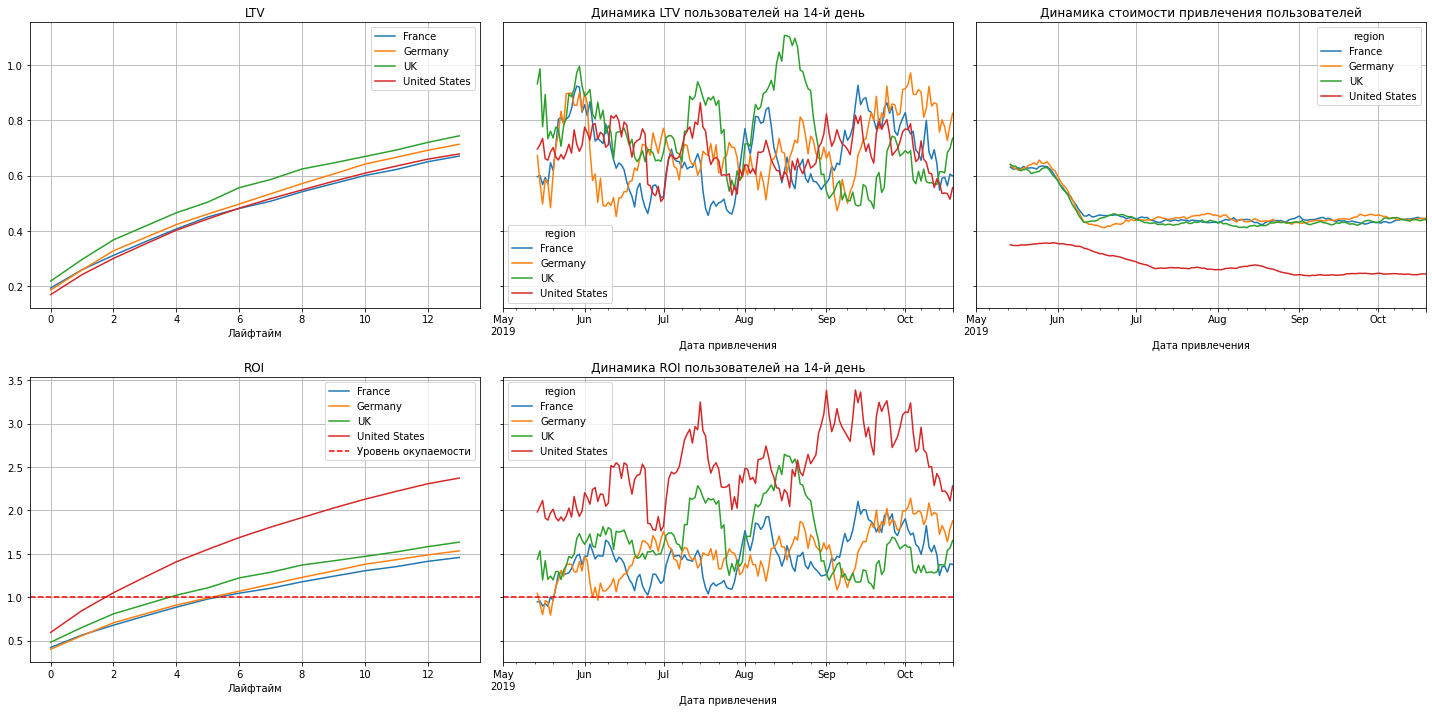

In [59]:
# убираем TipTop  из профилей
profiles_without_tiptop_faceboom = profiles_without_organic.query('channel != "TipTop" and channel != "FaceBoom"').copy()

dimensions = ['region']
# Получаем результаты
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_without_tiptop_faceboom, orders, observation_date, horizon_days, dimensions=dimensions
)
# Визуализируем
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Картина заметно улучшилась. На предыдущем графике ROI по США постоянно шел вниз, а без учета TipTop и FaceBoom затраты на рекламу окупаются на 2-й день.

Построим и изучим графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам. 

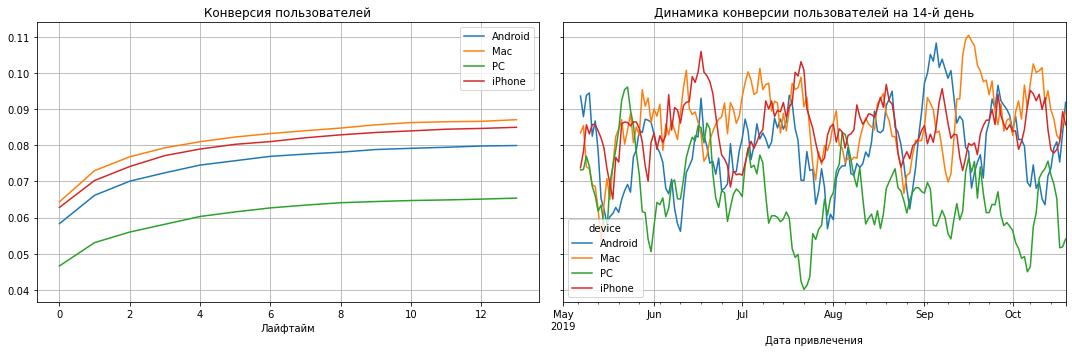

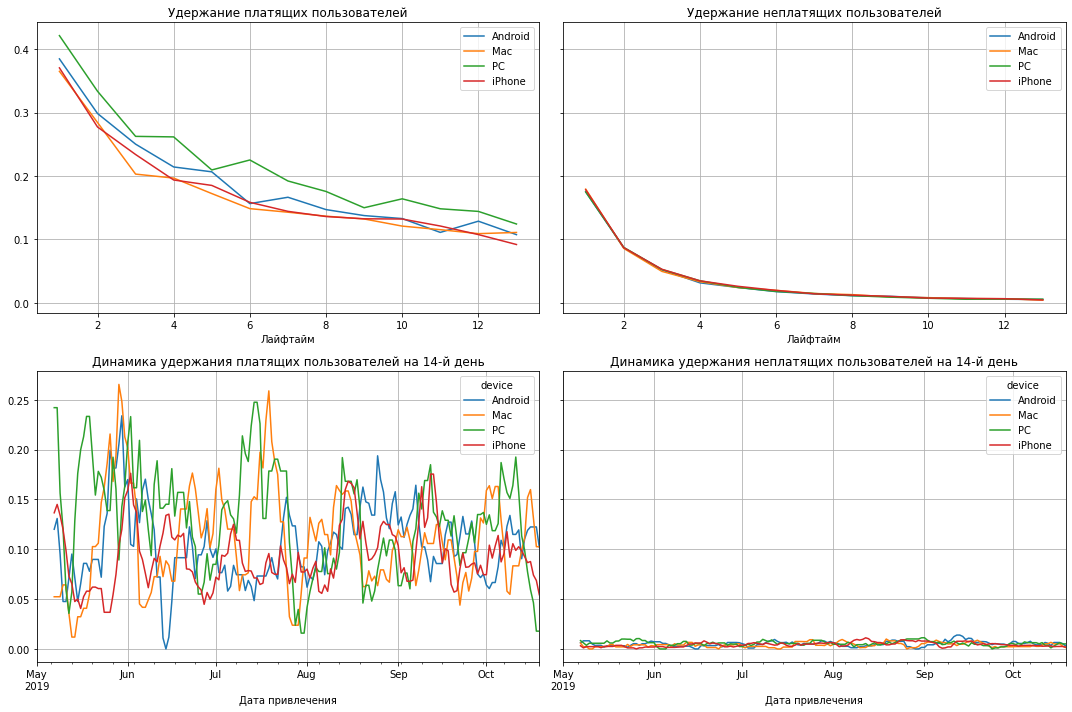

In [60]:
# смотрим конверсию и удержание с разбивкой по устройствам
dimensions = ['device']

# Конверсия
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 


# Удержание
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_without_organic, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Пользователи стабильно неплохо конверcируются. Mac и iPhone конверcируются лучше остальных устройств, PC отстает.
Диамика удержания платящих пользоватей также достаточно стабильна.

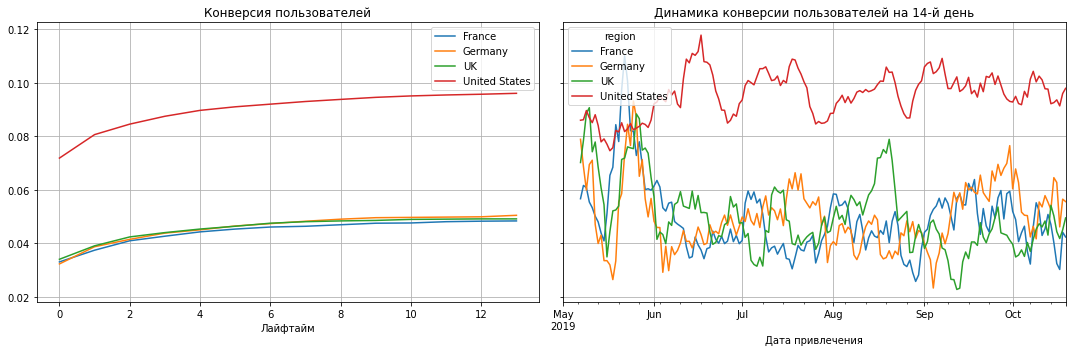

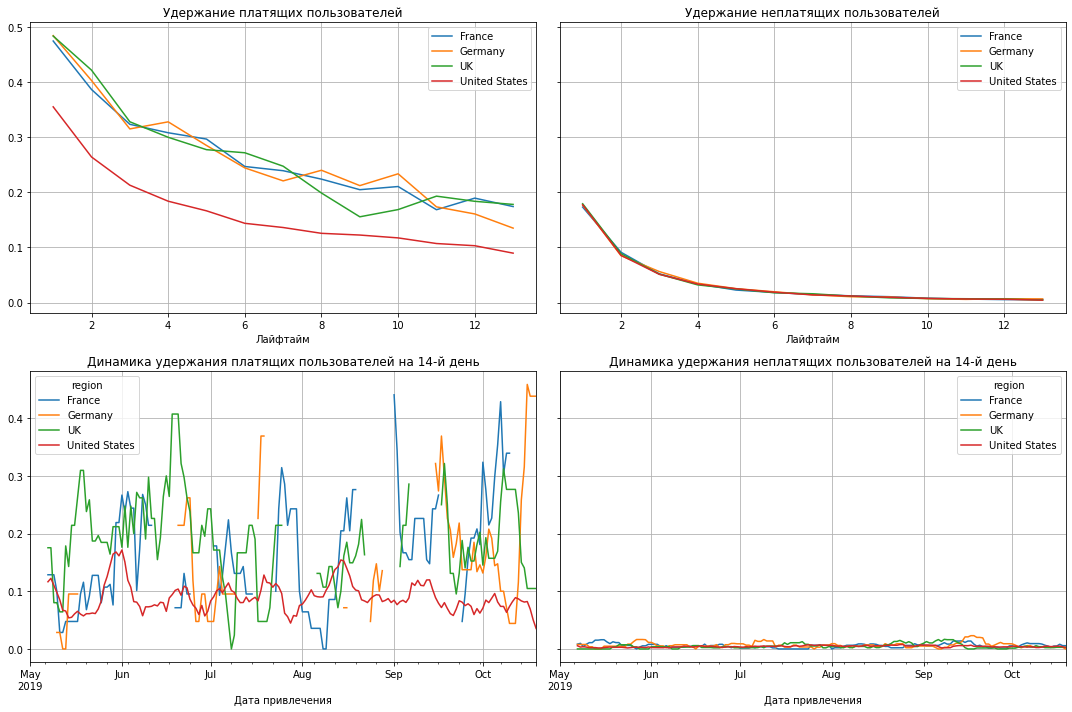

In [61]:
# смотрим конверсию и удержание с разбивкой по странам
dimensions = ['region']

# Конверсия
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 


# Удержание
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_without_organic, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Пользователи из США конверcируются лучше остальных, а вот удерживать пользователей из США получается хуже.
Лидеры по удержанию Англия, Германия и Франция.

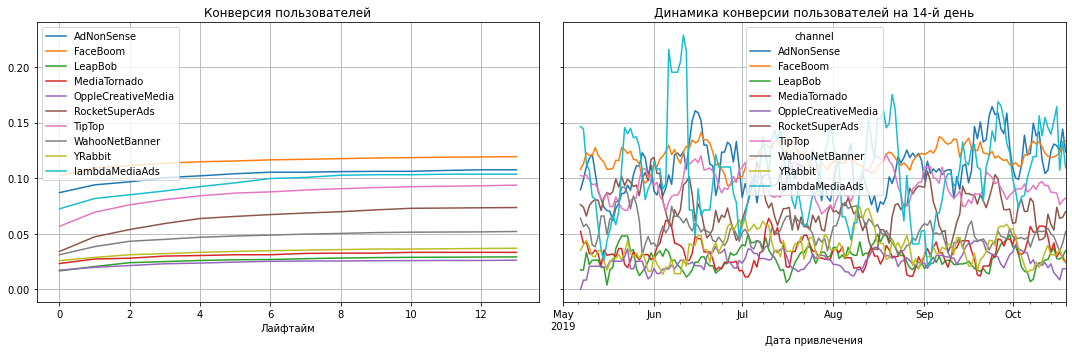

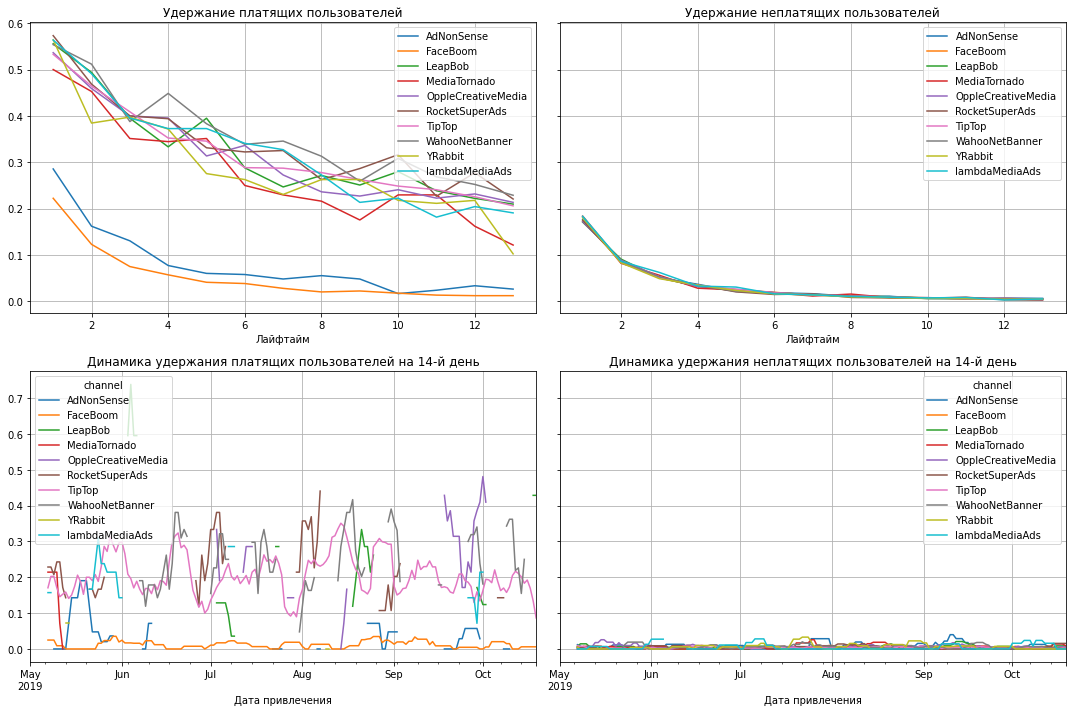

In [62]:
# смотрим конверсию и удержание с разбивкой по каналам
dimensions = ['channel']

# Конверсия
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 


# Удержание
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_without_organic, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Пользователи, привлеченные через FaceBoom и AdNonSense, имеют высокую конверсию. Однако, несмотря на это, они удерживаются хуже всех. Это может быть вызвано различными факторами, такими как несоответствие ожиданиям пользователей или недостаточная персонализация.

С другой стороны, пользователи, привлеченные из других каналов, показывают стабильную динамику удержания. Это говорит о том, что эти каналы привлекают пользователей, которые остаются активными и продолжают пользоваться продуктом или услугой на долгосрочной основе.

## <a name="6"> 6. Выводы. Рекомендации отделу маркетинга.</a>

Была проделана большая аналитическая работа.
В ходе работы мы выяснили:

- Откуда приходят и какими устройствами пользуются пользователи сервиса;
- Долю платящих клиентов в разбивке по странам, устройствам и каналам привлечения;
- Стоимость привлечения пользователей;
- Когда окупаются затраты на рекламу;
- Посчитали сумму расходов и оценили окупаемость рекламы.

### Выводы:

При определении рекомендаций будем учитывать, что в бизнес-плане заложена окупаемость не позднее чем через две недели после привлечения. В нашем случае окупаемость не наступает к 14-му дню после привлечения пользователей.
Какие же основные причины неэффективности маркетенговой компании мы обнаружили:
1. Основная часть наших пользователей, более 50% - из США, именно они перестали окупаться с июня месяца. Они лучше конверсируются и показывают хороший LTV, но плохо удерживаются.
2. Основная часть трат на рекламу уходит на 2 платформы - TipTop и FaceBoom, которые не окупаются. Пользователи канала TipTop самые дорогие, но приводят меньше клиентов, чем FaceBoom. Каналы  AdNonSense и FaceBoom показывают самую высокую конверсию при низком удержании и значительных тратах на рекламу.
3. Iphone и Mac показывают результаты хуже, чем Android и PC. Возможно дело в том, что у большинства американцев эти девайсы, соотвенно они и будут себя хуже показывать.

### Рекомендации:

1. Необходимо проанализировать наше приложение на предмет востребованности услуг в регионах, возможно есть услуги, которые лучше продаются в Европе, чем в Америке.
2. Для пользователей США можно разработать и внедрить персонализированные меры удержания, такие как специальные предложения, скидки или персональные рекомендации.
3. Нужно пересмотреть распределение затрат на рекламу в сторону Европейских каналов, т.к. они неплохо конверсируются, удерживаются и стабильно окупаются, но имеют значительно меньше пользователей.
4. Нужно сократить затраты на рекламу в TipTop и разобраться как они продвигают наш продукт, что изменилось с июня, почему при высоких затратах  платящих пользователей мало.
5. Так же стоит проанализировать техническую часть приложения на предмет ошибок/лагов для устройств Iphone и Mac, возможно здесь 
кроется причина низкого удержания.
6. В качестве альтернативных источников привлечения, рекомендую рассмотреть каналы из США - YRabbit и RocketSuperAds,  из европейских источников - LambdaMediaAds и LeapBob. Они стабильно окпаются и хорошо удерживаются.